# Climate Analysis

In [160]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import matplotlib
import pandas as pd
import numpy as np
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [161]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
session = Session(engine)

In [162]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0, 63),
 (3, 'USC00519397', '2010-01-03', 0, 74),
 (4, 'USC00519397', '2010-01-04', 0, 76),
 (5, 'USC00519397', '2010-01-06', None, 73)]

In [163]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [164]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp INTEGER
tobs INTEGER


In [165]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [166]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
measurements = Base.classes.measurements

# Precipitation Analysis

In [167]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
### BEGIN SOLUTION
percip = session.query(measurements.date,measurements.prcp).\
    filter(measurements.date > '2016-08-23').\
    order_by(measurements.date).all()

In [168]:
# Plot the Results
### BEGIN SOLUTION

plt.style.use('classic')

df = pd.DataFrame(percip, columns=['date', 'prcp'])
df.set_index('date')
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


<IPython.core.display.Javascript object>


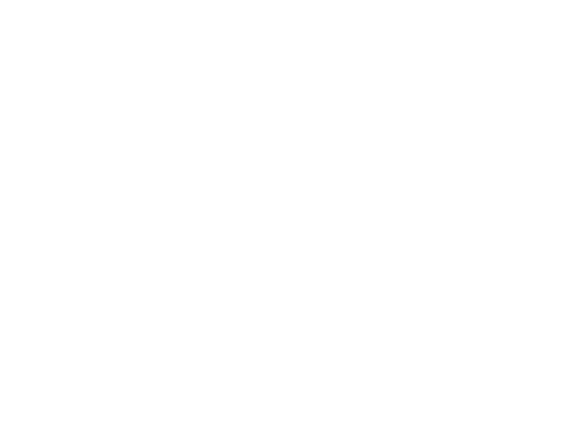

In [169]:
df.plot.bar()
plt.tight_layout()
plt.xlabel('Dates',fontsize=(18))
plt.ylabel('Percipitation (inches)',fontsize=(18));
plt.title('2016 Observed Rainfall in Hawaii',fontsize=(25));

plt.legend(fontsize='x-large')
plt.xticks(rotation= '45')
plt.show()
### END SOLUTION

# Station Analyis

In [170]:
format(session.query(stations.station).count())

'9'

In [171]:
start_results = session.query(func.avg(measurements.tobs),func.min(measurements.tobs),func.max(measurements.tobs)).\
filter(measurements.date >= '2016-08-23' ).all()

start_results

[(74.59058295964125, 58, 87)]

In [172]:
tobs = session.query(measurements.station, func.count(measurements.date)).group_by(measurements.station).order_by(func.count(measurements.date)).all()
tobs

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [173]:
#most active station
most = tobs[8]
most

('USC00519281', 2772)

In [174]:
#use this value count number to filter the correct dataset

#Find Precipitation Data from the Last 12 months
tobs_data = session.query(measurements.tobs, measurements.station).\
    filter(measurements.date > '2016-08-23').\
    order_by(measurements.tobs).all()

In [175]:
df = pd.DataFrame(tobs_data)
df["station"].value_counts()

USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: station, dtype: int64

In [176]:
#Find Precipitation Data from the Last 12 months
tobs1 = session.query(measurements.tobs, measurements.station).\
    filter(measurements.date > '2016-08-23').\
    filter(measurements.station == 'USC00519397').\
    order_by(measurements.tobs).all()

<IPython.core.display.Javascript object>


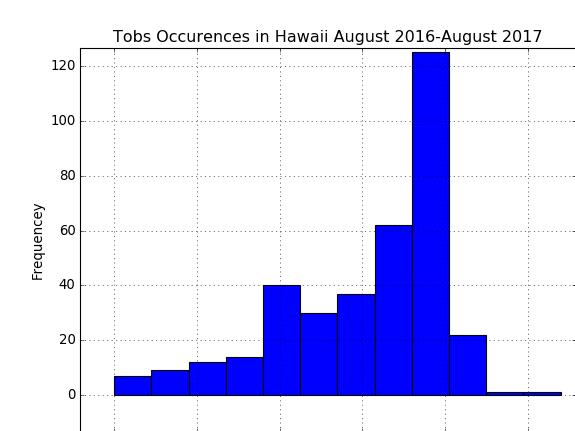

In [177]:
#histogram the data
tobs1_df = pd.DataFrame(tobs1)
data = tobs1_df['tobs']

thing2 = data.hist(bins = 12)
thing2.set_ylabel("Frequencey")
thing2.set_xlabel("Tobs")
plt.title('Tobs Occurences in Hawaii August 2016-August 2017')

plt.show()


# Tobs Analysis

In [182]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62, 69.57142857142857, 74)]


In [183]:
tenative_date = calc_temps('2016-08-21','2016-08-28')

In [199]:
trip_lt = list(np.ravel(tenative_date))
data = trip_lt[1]
delta= trip_lt[2]-trip_lt[0]
width = .00000000000000000000000000000000000000000000000000000000000001
N = 1
ind = np.arange(N)

<IPython.core.display.Javascript object>


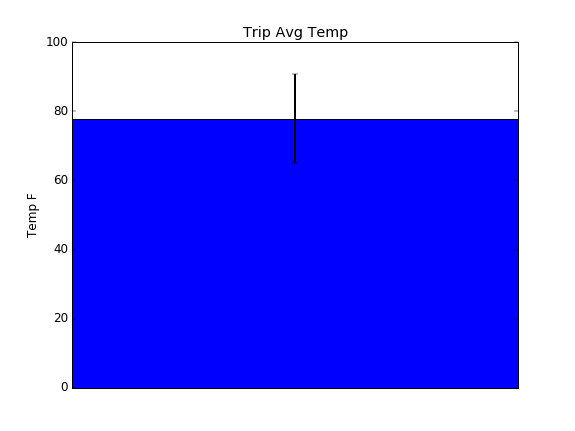

In [200]:
thing3 = plt.bar(ind, data, color='blue',yerr=delta, error_kw=dict(elinewidth=2,ecolor='black'))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.ylabel("Temp F")
plt.title("Trip Avg Temp")
plt.show()